In [1]:
from sklearn import datasets
iris=datasets.load_iris()

In [2]:
import pandas as pd

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y=iris.target

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
#import StringIO, Image, export_graphviz,pydotplus
from sklearn.externals.six import StringIO

In [11]:
from IPython.display import Image

In [14]:
from sklearn.tree import export_graphviz

In [15]:
import pydotplus

In [37]:
#plotting decision tree
dot_data=StringIO()


In [38]:
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=iris.feature_names,class_names=iris.target_names)


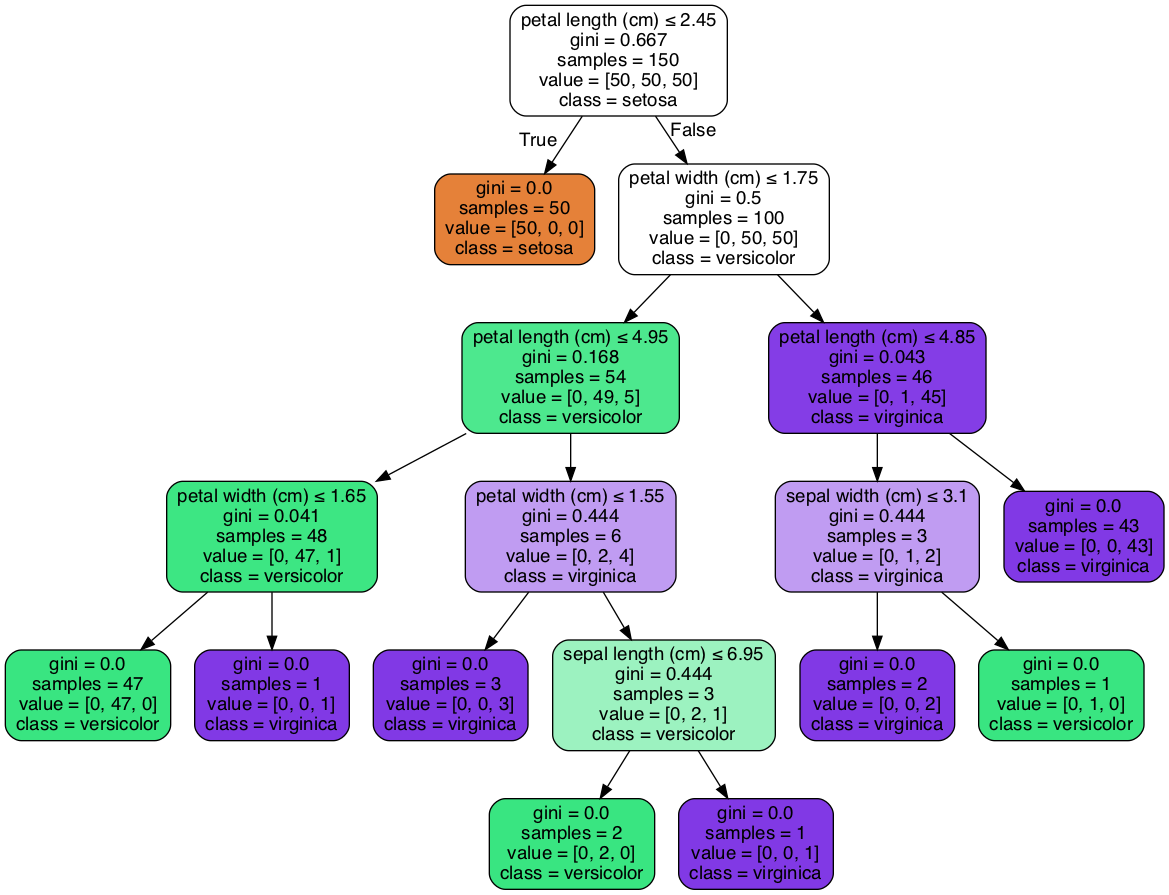

In [39]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
#--in decision tree ,1. we need to decide which features to chose at starting,2.which feature to use for split at each step, based
#on accuracy, and 3.when to stop: when no more feature left to split, or reached pure node.

#--In case of discrete values, we split into discrete pts and get small no of childs. eg 3 types of class in iris.
#--In case of continouos values, i.e when features have any values, like feature having salary, will hv large diff datapoints
#so plot all diff datapoints on a line. Take mean of all pairs of 2 adjacent points. And mean point around which accuracy is max, we split

#--Entropy tell randomness, calculted using child nodes.Info gain by change in entropy from parent to child. Info gain
#should be high, means entropy should be from max to min , moving parent to child. 
#--Since In case of feature like name,if used to split, parent node will divide into n pure nodes. So info gain is high, but 
#overfitting takes places. SO consider splitting no also. Along with info gain. High info gain, low split no is req.
#or we can say, gain ratio should be high

#--pruning
#--gini index: internal method to check which feature to use to split.

In [40]:
from sklearn import datasets

In [41]:
dataset=datasets.load_digits()

In [42]:
data=dataset.data
target=dataset.target

In [43]:
data.shape,target.shape

((1797, 64), (1797,))

In [44]:
import pandas as pd

In [46]:
df=pd.DataFrame(dataset.data)

In [47]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [48]:
import numpy as np

In [49]:
df=pd.DataFrame(data)
df=np.array(df)

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


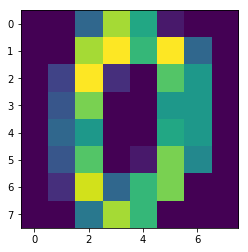

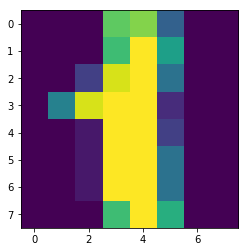

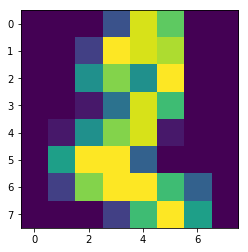

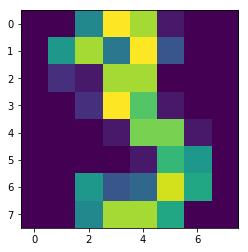

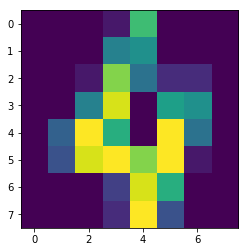

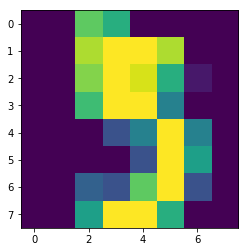

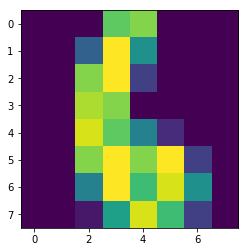

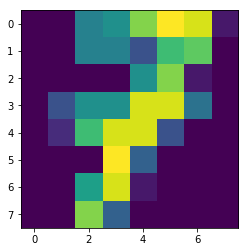

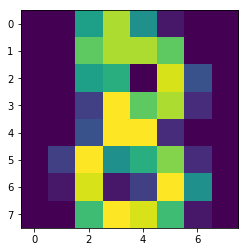

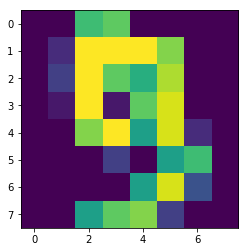

In [52]:
for i in range(10):
    plt.imshow(df[i].reshape(8,8))
    plt.show()

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(data,target,random_state=1)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
clf=LogisticRegression()

In [57]:
clf.fit(x_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
clf.score(x_test,y_test)

0.9644444444444444